<a href="https://colab.research.google.com/github/nishujain2203/DL-2-august-weekend/blob/main/DL_linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as  np
import  pandas as  pd
import seaborn as  sns
import matplotlib.pyplot as plt
from warnings  import  filterwarnings
filterwarnings('ignore')


In [ ]:
path  = '/content/Cars.xlsx'

In [ ]:
df  = pd.read_excel(path  , keep_default_na= False  , na_values= ["" , "NA"])

#Basic  checks and quality checks

In [ ]:
df.head()

,id1,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
1,2,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,...,5,188,103,70,40,27.5,14.0,3510,non-USA,Lexus ES300
2,3,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,...,5,179,102,67,37,27.0,14.0,3085,non-USA,Subaru Legacy
3,4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
4,5,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier


In [ ]:
df.shape

(8556, 28)

In [ ]:
df.columns

Index(['id1', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8556 entries, 0 to 8555
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id1                 8556 non-null   int64  
 1   Manufacturer        8556 non-null   object 
 2   Model               8556 non-null   object 
 3   Type                8556 non-null   object 
 4   Min.Price           8556 non-null   float64
 5   Price               8556 non-null   float64
 6   Max.Price           8556 non-null   float64
 7   MPG.city            8556 non-null   int64  
 8   MPG.highway         8556 non-null   int64  
 9   AirBags             8185 non-null   object 
 10  DriveTrain          8556 non-null   object 
 11  Cylinders           8556 non-null   object 
 12  EngineSize          8556 non-null   float64
 13  Horsepower          8556 non-null   int64  
 14  RPM                 8556 non-null   int64  
 15  Rev.per.mile        8556 non-null   int64  
 16  Man.tr

In [ ]:
df.isnull().sum()

,0
id1,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,371


In [ ]:
df.dtypes

,0
id1,int64
Manufacturer,object
Model,object
Type,object
Min.Price,float64
Price,float64
Max.Price,float64
MPG.city,int64
MPG.highway,int64
AirBags,object


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop  id  column
df.drop(['id1'] , axis =  1  , inplace  =  True)

# Seperate  x & y

In [ ]:
x  =  df.drop(['Weight'] , axis =  1)
y =  df['Weight']

# seperate  cat  & num  data

In [ ]:
df['Cylinders'].dtype

dtype('O')

In [ ]:
df['Cylinders'].value_counts()

,count
Cylinders,
4,4492
6,2866
8,617
3,299
5,195
rotary,87


In [ ]:
x['Cylinders'].replace({"rotary"  : 7} ,  inplace  = True)

In [ ]:
x['Cylinders'] =  x['Cylinders'].astype('float64')


In [ ]:
cat  = x.columns[x.dtypes  =='object']
num  =   x.columns[x.dtypes  !='object']

In [ ]:
print(cat)
print()
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')


Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')


# create  pipeline

In [ ]:
x.dtypes

,0
Manufacturer,object
Model,object
Type,object
Min.Price,float64
Price,float64
Max.Price,float64
MPG.city,int64
MPG.highway,int64
AirBags,object
DriveTrain,object


In [ ]:
from sklearn.pipeline import  Pipeline
from  sklearn.preprocessing import  StandardScaler ,  OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.impute import  SimpleImputer

In [ ]:
num_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'mean')) ,
                                   ('scaler' ,  StandardScaler ()  )]   )
cat_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'most_frequent' )) ,
                                   ('encoder' , OrdinalEncoder())])


In [ ]:
pre = ColumnTransformer([('num' ,  num_pipeline ,  num )  , ('cat' ,  cat_pipeline , cat ) ])

In [ ]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object'))])

In [ ]:
'Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'

IndentationError: unexpected indent (ipython-input-1164209932.py, line 2)

In [ ]:
x["Model"].unique()


array(['Tercel', 'ES300', 'Legacy', 'Lumina_APV', 'Cavalier', 'Eurovan',
       'Festiva', 'Vision', 'Diamante', 'Justy', 'Grand_Prix', 100,
       'LeSabre', 'Century', 900, 'Eighty-Eight', 'Lumina', 'Metro',
       'Stealth', 'SL', 'Altima', 'Roadmaster', 'Cutlass_Ciera', 240,
       'Maxima', 'Caprice', 'Sentra', 'Previa', 'Legend', 'Spirit',
       'Taurus', 'Shadow', 90, 'Cougar', 'Fox', 'Firebird', 'Quest',
       'Camry', 'Sonata', 'Tempo', 'Dynasty', 'Bonneville', 'Corvette',
       'LeMans', 'Civic', 'SC300', 'Caravan', 'Continental', 'Protege',
       'Capri', 'Probe', 323, 'Town_Car', 850, 'Concorde', 'Escort',
       'Silhouette', 'Riviera', 'Accord', 'LeBaron', 'Achieva', '190E',
       'Swift', 'Corsica', 'Seville', 'Passat', 'Colt', 'Elantra',
       'Celica', 'Crown_Victoria', 'RX-7', 'Astro', 'Aerostar', 'Loyale',
       'Storm', 626, 'Q45', 'Excel', 'Summit', 'Integra', 'Mirage',
       'Sunbird', 'Mustang', 'DeVille', 'Scoupe', '535i', 'MPV', 'Camaro',
       'Laser'

In [ ]:
x['Model'] =  x['Model'].replace({100 : '100' , 900 : '900' ,  240 : '240' , 90 :  '90' ,  323 : '323' , 850 : '850' , 626  : '626' ,  } )

# fit  transform data

In [ ]:
X  = pre.fit_transform(x)

# data frame

In [ ]:
X  =  pd.DataFrame(X , columns  = pre.get_feature_names_out())

In [ ]:
X

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__Cylinders,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,...,num__Rear.seat.room,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Man.trans.avail,cat__Origin,cat__Make
0,-1.065131,-1.008628,-0.923020,1.680241,1.461275,-0.751581,-1.126873,-1.180752,-0.127721,2.370666,...,-1.321164,-1.041774,29.0,90.0,3.0,1.0,1.0,1.0,1.0,86.0
1,1.181869,0.876793,0.587973,-0.776170,-0.949254,0.787374,0.330813,0.818523,-0.127721,-0.024507,...,-0.124851,0.043071,15.0,37.0,2.0,1.0,1.0,1.0,1.0,48.0
2,-0.095613,-0.003761,0.069138,0.101120,0.163298,-0.751581,-0.446619,-0.249051,0.548139,-0.014358,...,-0.295753,0.043071,27.0,54.0,0.0,1.0,0.0,1.0,1.0,80.0
3,-0.278111,-0.335263,-0.358673,-0.776170,-1.134679,0.787374,1.108245,0.527367,-0.803580,-1.313435,...,0.900561,0.000000,5.0,58.0,5.0,2.0,1.0,0.0,0.0,18.0
4,-0.985289,-0.635688,-0.331366,0.452036,1.275850,-0.751581,-0.446619,-0.637259,-0.127721,0.087133,...,-0.979360,-0.318544,5.0,21.0,0.0,2.0,1.0,1.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,-0.654512,-0.842877,-0.959430,0.452036,0.905000,-0.751581,-0.446619,-0.637259,-0.127721,0.665628,...,-0.637556,0.043071,5.0,29.0,0.0,1.0,1.0,1.0,0.0,15.0
8552,-0.494827,-0.573531,-0.613540,0.276578,0.163298,-0.751581,-0.640977,-0.540207,0.379174,0.005940,...,-1.662968,1.489531,10.0,67.0,4.0,1.0,1.0,1.0,0.0,35.0
8553,1.044996,0.700683,0.396823,-0.600712,-0.392978,0.787374,1.108245,0.527367,-0.803580,-1.313435,...,-0.466654,0.043071,3.0,72.0,2.0,1.0,1.0,0.0,0.0,7.0
8554,-1.019507,-1.091504,-1.095965,1.504784,2.202977,-0.751581,-1.029694,-1.336035,0.548139,1.609489,...,-0.808458,1.127916,24.0,52.0,3.0,2.0,1.0,1.0,0.0,75.0


#  split data  in training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train  , x_test  ,  y_train  ,  y_test =  train_test_split(X  , y , test_size  = 0.2 ,  random_state= 34)

In [ ]:
print(x_train.shape   , y_train.shape)
print(x_test.shape ,  y_test.shape)

(6844, 26) (6844,)
(1712, 26) (1712,)


# model  fitting

In [ ]:
from  keras.models import  Sequential
from keras.layers import Dense , Input

In [ ]:
x_train.shape[1]

26

In [ ]:
model  =  Sequential()

In [ ]:
# add  input layer
model.add(Input(shape= (x_train.shape[1] ,)))

# hidden  layer
# multiple  of  2
model.add(Dense(32 ,  activation= 'relu' ))
model.add(Dense(16 ,  activation= 'relu' ))

# output layer
model.add(Dense(1, activation= 'linear'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

# compile model

In [ ]:
 model.compile(optimizer= 'adam' , metrics  = ['mae'] , loss =  'mse'   )

In [ ]:
# fit model

In [ ]:
hist = model.fit(x_train  , y_train  ,  epochs= 50 ,
                 batch_size = 10 , verbose= 1  ,  validation_split= 0.2 )

Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 24.3943 - mae: 3.3938 - val_loss: 51.3391 - val_mae: 5.9730
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 24.6018 - mae: 3.8265 - val_loss: 4.7204 - val_mae: 1.7627
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32.8917 - mae: 4.2616 - val_loss: 3.9920 - val_mae: 1.5909
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.0844 - mae: 2.2088 - val_loss: 18.1952 - val_mae: 3.4017
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19.5110 - mae: 3.1029 - val_loss: 32.2316 - val_mae: 4.3350
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 31.8067 - mae: 4.1278 - val_loss: 300.3182 - val_mae: 14.4485
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 127.8827 - mae: 7.8392 - val_loss: 3.8482 - val_mae: 1.5308
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10.0217 - mae: 2.3545 - val_loss: 112.5721 - val_mae: 8.2139
Epoch 9/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 

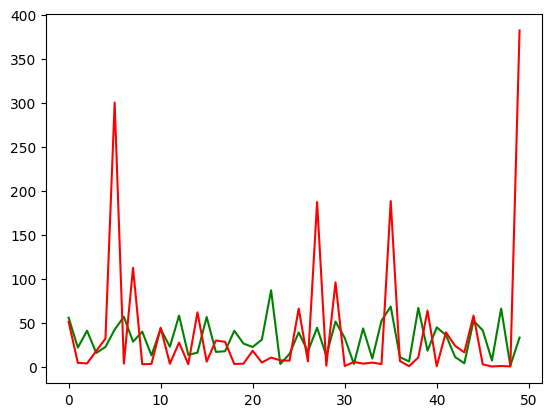

In [ ]:
plt.plot(hist.history['loss'] , c = 'green')
plt.plot(hist.history['val_loss'] , c = 'red')

In [ ]:
pred  =model.predict(x_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_test_pred  = model.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
out = pd.DataFrame()
out['train'] =  y_train
out['pred'] = pred

In [ ]:
out

,train,pred
5486,3695,3682.956055
5089,2890,2879.015381
930,2545,2521.850098
5574,3735,3729.379883
4851,3525,3497.986572
...,...,...
5667,2450,2422.470703
324,3495,3487.138672
3157,3495,3487.138672
5993,3785,3767.718018


In [ ]:
test_pred = model.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
out_test =